In [38]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
import time
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from torch import nn
from ray.tune import CLIReporter


In [39]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
]

# De-correlated confounders in target- and test-data

In [40]:
search_space = {
    "model":None,
    "device":"cuda",
    "loss_fn":nn.CrossEntropyLoss(),
    "epochs":200,
    "batch_size":128,
    "optimizer":torch.optim.Adam,

    "alpha":tune.uniform(0,1),
    "lr": tune.loguniform(1e-5,1e-1),
    "weight_decay": tune.loguniform(1e-5,1e-1),
}
max_t = 150
samples = 100

In [41]:
def plot_analysis(analysis):
    dfs = analysis.trial_dataframes
    ax = None  # This plots everything on the same plot
    for d in dfs.values():
        ax = d.mean_accuracy.plot(ax=ax, legend=False)

# BrNet

In [42]:
c = CI.confounder()
model = Models.Br_Net()
search_space["model"] = model
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=128, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-13 17:40:16,097	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-13 17:40:17,914	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (18 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


== Status ==
Current time: 2022-07-13 17:40:20 (running for 00:00:04.31)
Memory usage on this node: 16.2/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/9.88 GiB heap, 0.0/4.94 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-13_17-40-16
Number of trials: 17/100 (16 PENDING, 1 RUNNING)
+------------------------+----------+----------------------+-----------+-------------+----------------+
| Trial name             | status   | loc                  |     alpha |          lr |   weight_decay |
|------------------------+----------+----------------------+-----------+-------------+----------------|
| train_tune_17b83_00000 | RUNNING  | 10.188.40.131:472116 | 0.333873  | 0.050127    |      0.0409224 |
| train_tune_17b83_00001 | PENDING  |                      | 0.0971708 | 0.000641899 |      0.0012546 |
+------------------------+----------+-----

2022-07-13 17:44:34,720	INFO tune.py:747 -- Total run time: 258.62 seconds (258.10 seconds for the tuning loop).


{'model': Br_Net_DANN(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 200,
 'batch_size': 128,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.7071987160576229,
 'lr': 0.002761628466543573,
 'weight_decay': 7.58026791

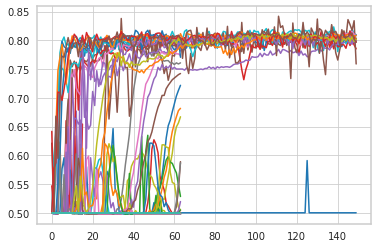

In [50]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free

In [44]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=128, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-13 17:44:36,880	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-13 17:44:39,958	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (18 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


== Status ==
Current time: 2022-07-13 17:44:42 (running for 00:00:05.43)
Memory usage on this node: 16.7/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/9.88 GiB heap, 0.0/4.94 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-13_17-44-37
Number of trials: 17/100 (16 PENDING, 1 RUNNING)
+------------------------+----------+----------------------+-----------+-------------+----------------+
| Trial name             | status   | loc                  |     alpha |          lr |   weight_decay |
|------------------------+----------+----------------------+-----------+-------------+----------------|
| train_tune_b32a8_00000 | RUNNING  | 10.188.40.131:474442 | 0.333873  | 0.050127    |    0.0409224   |
| train_tune_b32a8_00001 | PENDING  |                      | 0.0971708 | 0.000641899 |    0.0012546   |
| train_tune_b32a8_00002 | PENDING  |     

2022-07-13 17:48:17,163	WARNING util.py:214 -- The `reset` operation took 0.932 s, which may be a performance bottleneck.
2022-07-13 17:48:17,173	WARNING util.py:214 -- The `start_trial` operation took 0.951 s, which may be a performance bottleneck.


Result for train_tune_b32a8_00085:
  date: 2022-07-13_17-48-17
  done: false
  experiment_id: 95b85e87aa3b42b28f3cecd0339e7125
  hostname: fedora
  iterations_since_restore: 27
  mean_accuracy: 0.599609375
  node_ip: 10.188.40.131
  pid: 474620
  time_since_restore: 37.26797437667847
  time_this_iter_s: 1.3515286445617676
  time_total_s: 37.26797437667847
  timestamp: 1657727297
  timesteps_since_restore: 0
  training_iteration: 27
  trial_id: b32a8_00085
  warmup_time: 0.024525880813598633
  
Result for train_tune_b32a8_00073:
  date: 2022-07-13_17-48-16
  done: false
  experiment_id: fdf875c44ebb492b9547b70a8d999b35
  hostname: fedora
  iterations_since_restore: 110
  mean_accuracy: 0.826171875
  node_ip: 10.188.40.131
  pid: 474442
  time_since_restore: 100.00647783279419
  time_this_iter_s: 1.4356932640075684
  time_total_s: 100.00647783279419
  timestamp: 1657727296
  timesteps_since_restore: 0
  training_iteration: 110
  trial_id: b32a8_00073
  warmup_time: 0.0061914920806884766


2022-07-13 17:50:03,953	INFO tune.py:747 -- Total run time: 327.07 seconds (326.65 seconds for the tuning loop).


Result for train_tune_b32a8_00094:
  date: 2022-07-13_17-50-03
  done: true
  experiment_id: 9a03114e4055454aa335c4371a5d0ccd
  hostname: fedora
  iterations_since_restore: 150
  mean_accuracy: 0.818359375
  node_ip: 10.188.40.131
  pid: 474527
  time_since_restore: 106.57830739021301
  time_this_iter_s: 0.19929814338684082
  time_total_s: 106.57830739021301
  timestamp: 1657727403
  timesteps_since_restore: 0
  training_iteration: 150
  trial_id: b32a8_00094
  warmup_time: 0.015117883682250977
  
== Status ==
Current time: 2022-07-13 17:50:03 (running for 00:05:26.71)
Memory usage on this node: 15.7/30.5 GiB
Using AsyncHyperBand: num_stopped=100
Bracket: Iter 64.000: 0.5166015625 | Iter 16.000: 0.5 | Iter 4.000: 0.5 | Iter 1.000: 0.5
Resources requested: 0/16 CPUs, 0/0 GPUs, 0.0/9.88 GiB heap, 0.0/4.94 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-13_17-44-37
Number of trials: 100/100 (100 TERMINATED)
+------------------------+------------+---------------------

TypeError: 'ExperimentAnalysis' object is not iterable

{'model': Br_Net_CF_free(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 200,
 'batch_size': 128,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.6667745521090559,
 'lr': 0.003778321323500341,
 'weight_decay': 0.02461

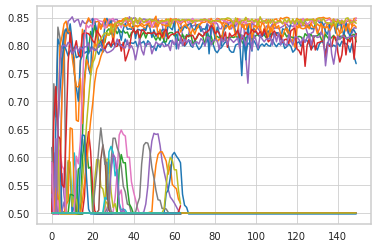

In [45]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free_conditioned

In [46]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=128, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params, conditioning=0)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-13 17:50:54,486	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-13 17:50:57,580	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (18 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


== Status ==
Current time: 2022-07-13 17:51:00 (running for 00:00:06.01)
Memory usage on this node: 16.8/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/9.88 GiB heap, 0.0/4.94 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-13_17-50-54
Number of trials: 17/100 (16 PENDING, 1 RUNNING)
+------------------------+----------+----------------------+-----------+-------------+----------------+
| Trial name             | status   | loc                  |     alpha |          lr |   weight_decay |
|------------------------+----------+----------------------+-----------+-------------+----------------|
| train_tune_94411_00000 | RUNNING  | 10.188.40.131:477467 | 0.333873  | 0.050127    |      0.0409224 |
| train_tune_94411_00001 | PENDING  |                      | 0.0971708 | 0.000641899 |      0.0012546 |
+------------------------+----------+-----

2022-07-13 17:54:21,077	INFO tune.py:747 -- Total run time: 206.59 seconds (206.01 seconds for the tuning loop).


{'model': Br_Net_DANN(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 200,
 'batch_size': 128,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.7071987160576229,
 'lr': 0.002761628466543573,
 'weight_decay': 7.58026791

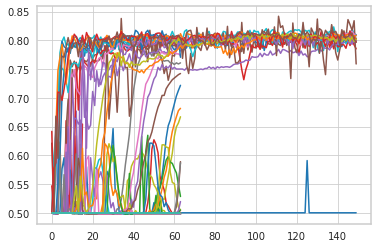

In [54]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")
#analysis.best_dataframe(metric="mean_accuracy", mode="max", scope="last-10-avg").plot()

# BrNet_DANN

In [48]:
c = CI.confounder()
model = Models.Br_Net_DANN(alpha=None)
search_space["model"] = model
c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=128, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-13 17:54:23,539	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-13 17:54:26,563	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (18 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


== Status ==
Current time: 2022-07-13 17:54:29 (running for 00:00:05.82)
Memory usage on this node: 16.8/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/9.88 GiB heap, 0.0/4.94 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-13_17-54-23
Number of trials: 17/100 (16 PENDING, 1 RUNNING)
+------------------------+----------+----------------------+-----------+-------------+----------------+
| Trial name             | status   | loc                  |     alpha |          lr |   weight_decay |
|------------------------+----------+----------------------+-----------+-------------+----------------|
| train_tune_10e01_00000 | RUNNING  | 10.188.40.131:479476 | 0.333873  | 0.050127    |      0.0409224 |
| train_tune_10e01_00001 | PENDING  |                      | 0.0971708 | 0.000641899 |      0.0012546 |
+------------------------+----------+-----

2022-07-13 17:58:17,574	WARNING util.py:214 -- The `callbacks.on_trial_result` operation took 1.187 s, which may be a performance bottleneck.
2022-07-13 17:58:17,577	WARNING util.py:214 -- The `process_trial_result` operation took 1.191 s, which may be a performance bottleneck.
2022-07-13 17:58:17,577	WARNING util.py:214 -- Processing trial results took 1.192 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2022-07-13 17:58:17,578	WARNING util.py:214 -- The `process_trial_result` operation took 1.193 s, which may be a performance bottleneck.


Result for train_tune_10e01_00040:
  date: 2022-07-13_17-58-17
  done: true
  experiment_id: 3e65b90aa22e47e18d26ecd09e90bbb1
  hostname: fedora
  iterations_since_restore: 150
  mean_accuracy: 0.802734375
  node_ip: 10.188.40.131
  pid: 479602
  time_since_restore: 151.36250352859497
  time_this_iter_s: 1.5814571380615234
  time_total_s: 151.36250352859497
  timestamp: 1657727897
  timesteps_since_restore: 0
  training_iteration: 150
  trial_id: 10e01_00040
  warmup_time: 0.02349090576171875
  
Result for train_tune_10e01_00056:
  date: 2022-07-13_17-58-17
  done: false
  experiment_id: e39aec9cc2fc448da1d234059a738fe0
  hostname: fedora
  iterations_since_restore: 83
  mean_accuracy: 0.802734375
  node_ip: 10.188.40.131
  pid: 479535
  time_since_restore: 83.97575902938843
  time_this_iter_s: 1.0493109226226807
  time_total_s: 83.97575902938843
  timestamp: 1657727897
  timesteps_since_restore: 0
  training_iteration: 83
  trial_id: 10e01_00056
  warmup_time: 0.018886804580688477
  


2022-07-13 18:01:04,751	INFO tune.py:747 -- Total run time: 401.21 seconds (400.72 seconds for the tuning loop).


{'model': Br_Net_DANN(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 200,
 'batch_size': 128,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.7071987160576229,
 'lr': 0.002761628466543573,
 'weight_decay': 7.58026791

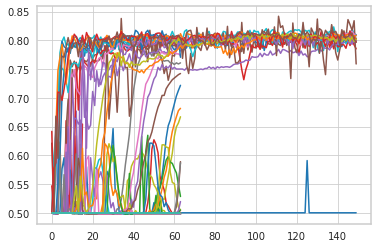

In [49]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")